# Exercise 1

We first load a dataset and examine its dimensions.

In [1]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

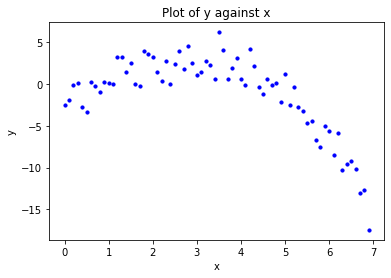

In [17]:
import matplotlib.pyplot as plt
# Your code for scatterplot here

plt.scatter(xy_data[:,0], xy_data[:,1], s=10, color ='blue')   # s can be used to adjust the size of the dots
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y against x')
plt.show()


### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [33]:
def polyreg(data_matrix, k):
    # Your code here
    # The function should return the the coefficient vector beta, the fit, and the vector of residuals
    
    x_array = data_matrix[:,0]
    y_array = data_matrix[:,1]
    N = np.shape(data_matrix)[0]
    
    # construct the X matrix
    poly_degree = min(N-1, k)
    X = np.column_stack([x_array**i for i in range(0,poly_degree+1)])
    
    # Computing the optimum coefficient vector beta* using the formula
    XT = X.T  # transpose
    beta_lin = np.linalg.inv(XT.dot(X)).dot(XT.dot(y_array))    #can also use the built-in function np.linalg.lstsq
    
    # find the fit
    fit_lin = X.dot(beta_lin)
    
    # residual
    resid_lin = y_array - fit_lin 
    
    return [beta_lin, fit_lin, resid_lin]
    

Use the tests below to check the outputs of the function you have written:

In [34]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0] 
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

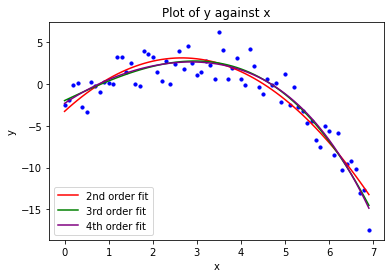

SSE_2 =  172.18102528988553
SSE_3 =  152.4058048891581
SSE_4 =  151.22778969027115
R_squared_2 =  0.8876297774918223
R_squared_3 =  0.9005356474205022
R_squared_4 =  0.9013044535638857


In [39]:
#Your code here

polyfit0 = polyreg(xy_data, k=0)
polyfit2 = polyreg(xy_data, k=2)
polyfit3 = polyreg(xy_data, k=3)
polyfit4 = polyreg(xy_data, k=4)

plt.scatter(xy_data[:,0], xy_data[:,1], s=10, color ='blue')
plt.plot(xy_data[:,0], polyfit2[1], label='2nd order fit', color ='red')
plt.plot(xy_data[:,0], polyfit3[1], label='3rd order fit', color ='green')
plt.plot(xy_data[:,0], polyfit4[1], label='4th order fit', color ='purple')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y against x')
plt.legend()

plt.show()

SSE_0 = np.linalg.norm(polyfit0[2])**2
SSE_2 = np.linalg.norm(polyfit2[2])**2
SSE_3 = np.linalg.norm(polyfit3[2])**2
SSE_4 = np.linalg.norm(polyfit4[2])**2
print("SSE_2 = ", SSE_2)
print("SSE_3 = ", SSE_3)
print("SSE_4 = ", SSE_4)

R_squared_2 = 1 - SSE_2/SSE_0
R_squared_3 = 1 - SSE_3/SSE_0
R_squared_4 = 1 - SSE_4/SSE_0
print("R_squared_2 = ", R_squared_2)
print("R_squared_3 = ", R_squared_3)
print("R_squared_4 = ", R_squared_4)



 #### State which model you choose and briefly justify your choice.
 
 
 I will choose model of degree 3. As it increases the performance to a significant extent, yet keeping the model rather simple
 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

Mean of residuals =  -0.0 Variance of residuals =  2.177


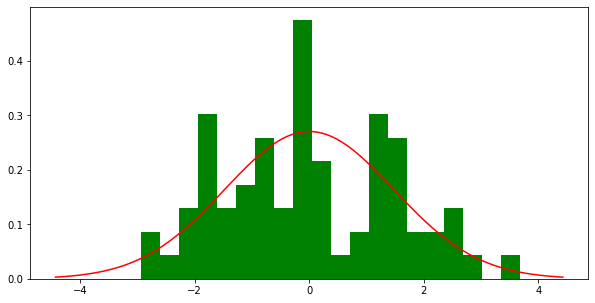

In [48]:
#Your code here

resid_lin = polyfit3[2]

print('Mean of residuals = ', np.round(np.mean(resid_lin), 5), 'Variance of residuals = ', 
      np.round(np.var(resid_lin), 3))

# Plot normed histogram of the residuals
n, bins, patches = plt.hist(resid_lin, bins=20, density=True, facecolor='green');

# Plot Gaussian pdf with same mean and variance as the residuals
from scipy.stats import norm

res_stdev = np.std(resid_lin)  #standard deviation of residuals
xvals = np.linspace(-3*res_stdev,3*res_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_stdev), 'r')
plt.show()
